<a href="https://colab.research.google.com/github/silvestr3/pytorch-tutorial/blob/main/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor
* In pythorch, a tensor is a torch;
* A multi-dimensional matrix containing elements of a single data type
* Default type is float32

In [188]:
import torch

x = torch.rand(3,4)
x

tensor([[0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294]])

### Creating tensors
Tensors can be created with `torch.Tensor()`


In [189]:
#scalar
scalar = torch.tensor(7)
scalar

tensor(7)

## Tensor operations

### Reshaping

Tensors can be reshaped, as long as all values from the first tensor can fit in the new dimensions of the new tensor

In [190]:
oned = torch.rand(10)
oned

tensor([0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053,
        0.2695])

In [191]:
twod = oned.reshape(2, 5)
twod

tensor([[0.8854, 0.5739, 0.2666, 0.6274, 0.2696],
        [0.4414, 0.2969, 0.8317, 0.1053, 0.2695]])

If the number of elements is unknown it is possible to reshape to the desired number of lines or columns, and passing ```-1``` to the other field

In [192]:
twolines = oned.reshape(2, -1)
twolines

tensor([[0.8854, 0.5739, 0.2666, 0.6274, 0.2696],
        [0.4414, 0.2969, 0.8317, 0.1053, 0.2695]])

In [193]:
oned[1] = 222
oned
twod

tensor([[8.8544e-01, 2.2200e+02, 2.6658e-01, 6.2745e-01, 2.6963e-01],
        [4.4136e-01, 2.9692e-01, 8.3169e-01, 1.0531e-01, 2.6949e-01]])

# PyTorch Workflow

1. Prepare and load data
2. build model
3. Train the model with the data
4. making predictions and evaluating a model (inference)
5. saving and loading a model

In [194]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Cheeck PyTorch version
torch.__version__

'2.2.1+cu121'

## Prepare and load data

Data can be almost anything in machine learning

* Excel spreadsheet
* Images
* Audio
* Text

Machine learning consists of two main parts:
1. Encode data in a numeric representation
2. Build a model that can learn patterns in this numerical representation

To showcase this, let's create some *known* data using a linear regression formula

We'll use a line regressiona forumula to make a straight line with *known* **parameters**

In [195]:
# create known parameters
weight = 0.7
bias = 0.3

#create data
start = 0
end = 2
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Splitting data into training and test sets

Let's create a training and test set with our data:

In [196]:
# creating a training sample with 80% of the original data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

Its possible to visualize the data using Matplotlib

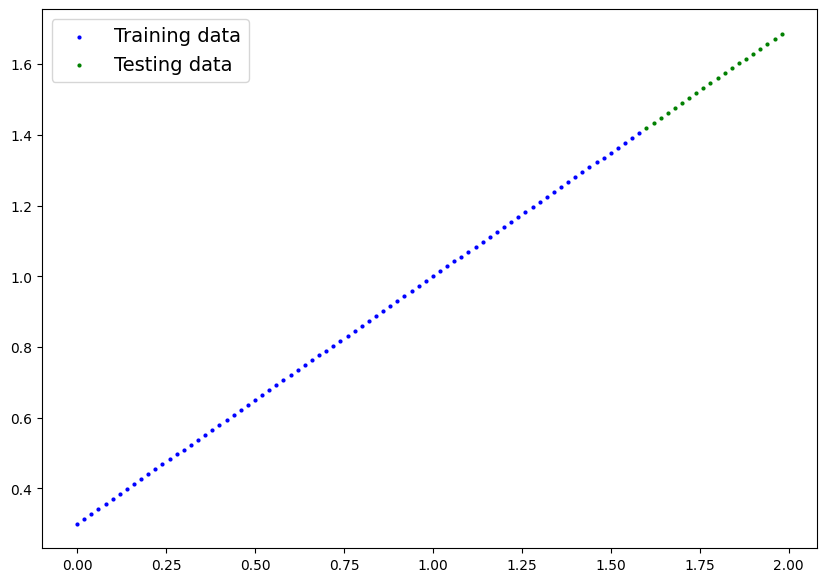

In [197]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test, predictions=None):
  """
  Plots training data, test data and compare predictions
  """

  # plot train data in blue
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

plot_predictions();

## Building a PyTorch model

* Start with random values of weight and values
* Look at training data and adjust the random values to better represent the ideal values (the weight and bias used to create the data)

1. Gradiend descent algorithm
2. Backpropagation algorithm

In [198]:
# create a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self, ):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))


    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias  # linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (neural networks)
* torch.nn.Parameter - what parameters the model should try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all neural network modules. Its implementation should overrite the `forward()` method
* forward() - method that defines what happens in the forward computations
* torch.optim - optimizers for pytorch, to help with gradiend descent functions
* torch.utils.data.Dataset - Represents a map between a key (label) and sample (features) pairs of data.
* torch.utils.data.Dataloader - allows to iterate over a dataset in order to load data into the model

In [199]:
# create a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()

#list model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [200]:
#list the named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [201]:
# The goal of this model is to learn from the sampmle training data
# to adjust its parameters values as close as possible to the values
# that generated the training data:

weight, bias

(0.7, 0.3)

## Making predictions using `torch.inference_mode()`

To theck the model's prediction capabilities, first let's test how well it predicts `y_test` based on `X_test` with the initial parameter values.

The data passed through the model is going to run in the `forward()` method

In [202]:
# The ideal model will take X_test, and output exacly y_test as its prediction

X_test, y_test

(tensor([[1.6000],
         [1.6200],
         [1.6400],
         [1.6600],
         [1.6800],
         [1.7000],
         [1.7200],
         [1.7400],
         [1.7600],
         [1.7800],
         [1.8000],
         [1.8200],
         [1.8400],
         [1.8600],
         [1.8800],
         [1.9000],
         [1.9200],
         [1.9400],
         [1.9600],
         [1.9800]]),
 tensor([[1.4200],
         [1.4340],
         [1.4480],
         [1.4620],
         [1.4760],
         [1.4900],
         [1.5040],
         [1.5180],
         [1.5320],
         [1.5460],
         [1.5600],
         [1.5740],
         [1.5880],
         [1.6020],
         [1.6160],
         [1.6300],
         [1.6440],
         [1.6580],
         [1.6720],
         [1.6860]]))

In [203]:
# make predictions with model
# inference mode disables gradient tracking, because there is no need to change the parameters for now

with torch.inference_mode():
  y_predictions_rand = model_0(X_test)

y_predictions_rand

tensor([[0.6675],
        [0.6742],
        [0.6810],
        [0.6877],
        [0.6944],
        [0.7012],
        [0.7079],
        [0.7147],
        [0.7214],
        [0.7281],
        [0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]])

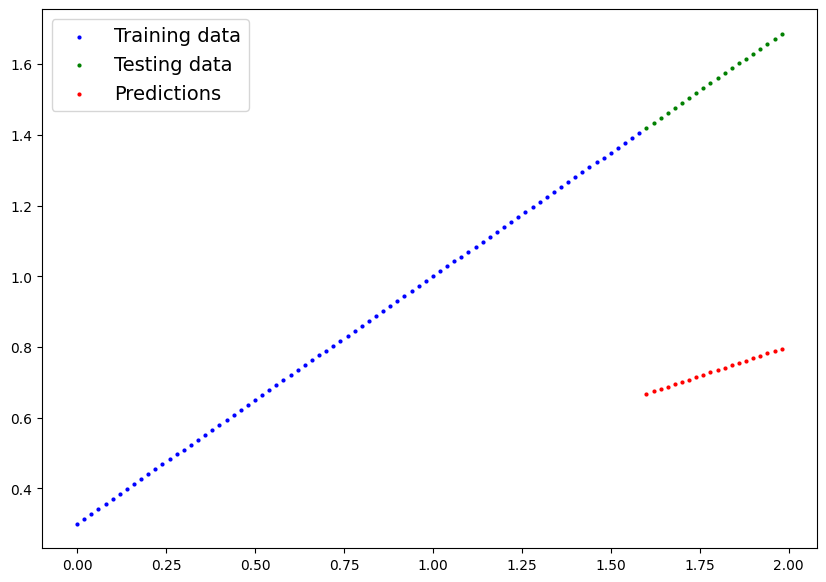

In [204]:
# plotting model's predictions to visualize
plot_predictions(predictions=y_predictions_rand)

## Training model

The whole idea behing training, is for a model to adjust from some *unknown* (may be random) parameters, to some *known* parameters.

In other words, from a `poor` representation to a better one.

One way to measure how poor or how wrong the model's predictions are, is to use a `loss function`. In a high level, the goal is to adjust the parameters so that the loss function returns the minimum possible value (0 error)

Things needed for the training

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better - https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer**: Takes into account the loss of a model and adjust the model's parameters (in this case weight and bias) to improve the loss function - https://pytorch.org/docs/stable/optim.html
* A training loop
* A testing loop

In [205]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [206]:
# Set up a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer
optimizer = torch.optim.SGD(
    model_0.parameters(),
    lr=0.01 # learning rate
)

### Building a training loop

Things we need in a training loop:
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

In [207]:
# an epoch is one loop through the data
epochs = 100

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode sets all parameter to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform back propagation on the loss with respect to the model's parameters
  loss.backward()

  # 5. Step the optimizer (perform gradiend descent)
  optimizer.step()


  model_0.eval()  #  turns off gradiend tracking


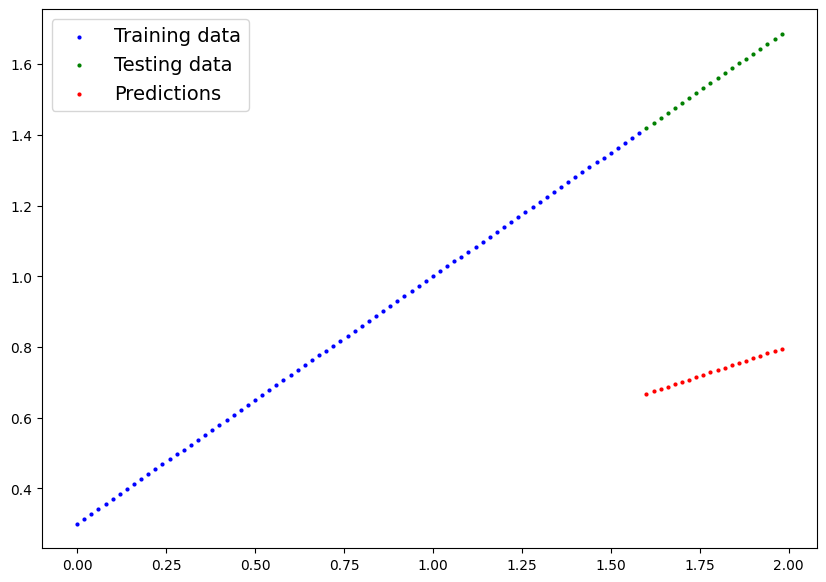

In [208]:
# After running the training loop a few times, it is possible to reduce the loss,
# that was initially calculated with random values, like:

plot_predictions(predictions=y_predictions_rand)

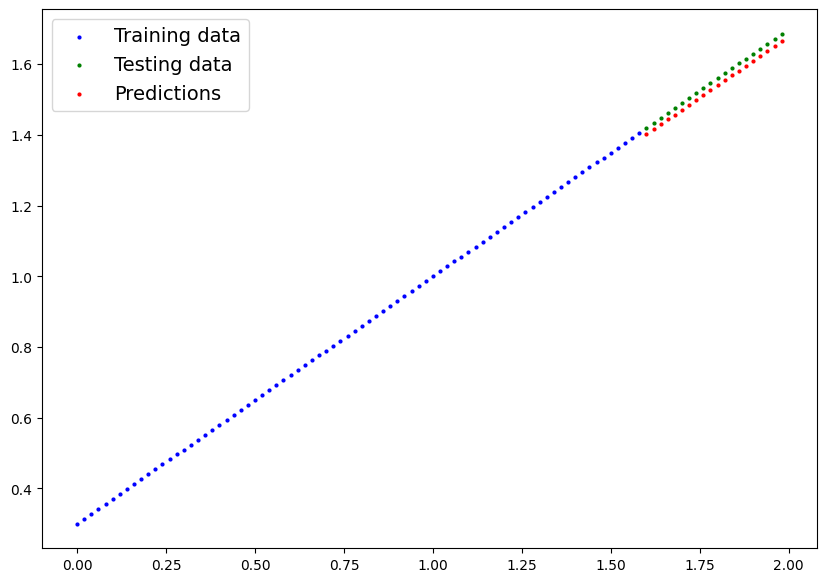

In [209]:
# To a more accurate prediction with the parameters tuned by the optimizer function
# This process can be repeated indefinetely, until the loss value is the closest possible to zero
with torch.inference_mode():
  y_predictions = model_0(X_test)

plot_predictions(predictions=y_predictions)